In [1]:
from keras.models import Sequential
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.python.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.utils import class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import tensorflow_addons as tfa

In [2]:
train_dir = "F:/softcom/dataset/festivals-Splitted/train"
test_dir = "F:/softcom/dataset/festivals-Splitted/test"

# Image size and batch size
img_height,img_width = 224, 224
img_size = (img_height,img_width)
batch_size = 16

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 3175 files belonging to 24 classes.
Using 2540 files for training.
Found 3175 files belonging to 24 classes.
Using 635 files for validation.
Found 804 files belonging to 24 classes.


In [3]:
class_weights_manual = {
    0: 19.3/71,
    1: 19.3/117,
    2: 19.3/90,
    3: 19.3/73,
    4: 19.3/63,
    5: 19.3/251,
    6: 19.3/272,
    7: 19.3/131,
    8: 19.3/204,
    9: 19.3/121,
    10: 19.3/193,
    11: 19.3/112,
    12: 19.3/71,
    13: 19.3/64,
    14: 19.3/98,
    15: 19.3/98,
    16: 19.3/90,
    17: 19.3/39,
    18: 19.3/50,
    19: 19.3/107,
    20: 19.3/62,
    21: 19.3/127,
    22: 19.3/64,
    23: 19.3/119
}

In [4]:
model = Sequential()


pretrained_model= tf.keras.applications.ConvNeXtBase(include_top=False,
                   input_shape=(img_height,img_width,3),
                   weights='imagenet')
for layer in pretrained_model.layers[:int(len(pretrained_model.layers)*.75)]:   
       layer.trainable=False

model.add(pretrained_model)
# Add GlobalAveragePooling layer
model.add(GlobalAveragePooling2D())
# [:int(len(pretrained_model.layers)*.75)]
# Add fully connected layer with L2 regularization
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(Dropout(0.2))
model.add(Dense(24, activation='softmax',kernel_regularizer=tf.keras.regularizers.l2(0.1)))
model.summary()
model1 = model

model1.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              sample_weight_mode='temporal'
             )

model1.load_weights('C:/Users/WIN10/Desktop/softcom codes/convnextbase.h5', skip_mismatch=False, by_name=False, options=None)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convnext_base (Functional)  (None, 7, 7, 1024)        87566464  
                                                                 
 module_wrapper (ModuleWrapp  (None, 1024)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              524800    
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 512)              0         
 pper)                                                           
                                                                 
 module_wrapper_3 (ModuleWra  (None, 256)              131328    
 pper)                                                  

In [5]:
model = Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(img_height,img_width, 3), dtype=tf.uint8))
model.add(tf.keras.layers.Lambda(lambda x: tf.cast(x, tf.float32)))
model.add(tf.keras.layers.Lambda(tf.keras.applications.densenet.preprocess_input))

pretrained_model= tf.keras.applications.DenseNet201(include_top=False,
                   input_shape=(img_height,img_width,3),
                   weights='imagenet')
for layer in pretrained_model.layers[:int(len(pretrained_model.layers)*.75)]:   
       layer.trainable=False

model.add(pretrained_model)
# Add GlobalAveragePooling layer
model.add(GlobalAveragePooling2D())
# [:int(len(pretrained_model.layers)*.75)]
# Add fully connected layer with L2 regularization
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(Dropout(0.2))
model.add(Dense(24, activation='softmax',kernel_regularizer=tf.keras.regularizers.l2(0.1)))
model.summary()
model2 = model

model2.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              sample_weight_mode='temporal'
             )

model2.load_weights('C:/Users/WIN10/Desktop/softcom codes/densenet.h5', skip_mismatch=False, by_name=False, options=None)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 224, 224, 3)       0         
                                                                 
 lambda_1 (Lambda)           (None, 224, 224, 3)       0         
                                                                 
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 module_wrapper_6 (ModuleWra  (None, 1920)             0         
 pper)                                                           
                                                                 
 module_wrapper_7 (ModuleWra  (None, 512)              983552    
 pper)                                                           
                                                                 
 module_wrapper_8 (ModuleWra  (None, 512)             

In [6]:
model = Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(img_height,img_width, 3), dtype=tf.uint8))
model.add(tf.keras.layers.Lambda(lambda x: tf.cast(x, tf.float32)))
model.add(tf.keras.layers.Lambda(tf.keras.applications.efficientnet.preprocess_input))

pretrained_model= tf.keras.applications.EfficientNetB7(include_top=False,
                   input_shape=(img_height,img_width,3),
                   weights='imagenet')
for layer in pretrained_model.layers[:int(len(pretrained_model.layers)*.75)]:   
       layer.trainable=False

model.add(pretrained_model)
# Add GlobalAveragePooling layer
model.add(GlobalAveragePooling2D())
# [:int(len(pretrained_model.layers)*.75)]
# Add fully connected layer with L2 regularization
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(Dropout(0.2))
model.add(Dense(24, activation='softmax',kernel_regularizer=tf.keras.regularizers.l2(0.1)))
model.summary()
model3 = model

model3.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              sample_weight_mode='temporal'
             )

model3.load_weights('C:/Users/WIN10/Desktop/softcom codes/efficientnet.h5', skip_mismatch=False, by_name=False, options=None)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_2 (Lambda)           (None, 224, 224, 3)       0         
                                                                 
 lambda_3 (Lambda)           (None, 224, 224, 3)       0         
                                                                 
 efficientnetb7 (Functional)  (None, 7, 7, 2560)       64097687  
                                                                 
 module_wrapper_12 (ModuleWr  (None, 2560)             0         
 apper)                                                          
                                                                 
 module_wrapper_13 (ModuleWr  (None, 512)              1311232   
 apper)                                                          
                                                                 
 module_wrapper_14 (ModuleWr  (None, 512)             

In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Average, Lambda


weight1 = .50
weight2 = .25
weight3 = .25

"""

weight1 = .24
weight2 = .18
weight3 = .58

7973

va1=74
va2=69
va3=79

weight1 = va1/va1+va2+va3

weight2 = va2/va1+va2+va3

weight3 = va3/va1+va2+va3


weight1 = .45
weight3 = .55

32 18 50
40 30 30 -> 0.8818
45 30 25 -> 0.8843
50 25 25 -> 0.8918 ***
60 20 20 -> 0.8893
54 23 23 -> 0.8893
48 26 26 -> 0.8881
52 24 24 -> 0.8905 **
50 26 24 -> 0.8893
"""

def weighted_average(inputs):
    output1, output2, output3= inputs
    weighted_output = (output1 * weight1 + output2 * weight2 + output3 * weight3 )
    return weighted_output


models=[model1,model2,model3]
model_input = Input(shape=(224, 224, 3))
model_outputs = [model(model_input) for model in models]
#ensemble_output = Average()(model_outputs)
ensemble_output = Lambda(weighted_average)(model_outputs)
ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')


ensemble_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
epochs=10


result=ensemble_model.evaluate(
    test_ds,
    batch_size=batch_size,
    verbose="auto"
)

51/51 [==============================] - 59s 764ms/step - loss: 0.5141 - accuracy: 0.8918


1/1 [==============================] - 0s 235ms/step
accuracy:  89.17910447761194
precision: [0.94736842 0.76923077 0.88461538 1.         0.94444444 0.83529412
 0.96296296 0.97297297 0.85714286 0.96774194 0.95081967 0.75
 1.         0.86363636 0.76470588 0.80645161 0.96       0.85714286
 1.         0.93548387 0.88235294 0.92105263 0.76190476 0.87878788]
recall: [0.85714286 0.57142857 0.85185185 1.         0.89473684 0.95945946
 0.96296296 0.92307692 0.98360656 0.83333333 1.         0.81818182
 0.9047619  1.         0.86666667 0.86206897 0.88888889 0.5
 0.93333333 0.90625    0.78947368 0.92105263 0.8        0.80555556]
fscore: [0.9        0.6557377  0.86792453 1.         0.91891892 0.89308176
 0.96296296 0.94736842 0.91603053 0.89552239 0.97478992 0.7826087
 0.95       0.92682927 0.8125     0.83333333 0.92307692 0.63157895
 0.96551724 0.92063492 0.83333333 0.92105263 0.7804878  0.84057971]
support: [21 35 27 22 19 74 81 39 61 36 58 33 21 19 30 29 27 12 15 32 19 38 20 36]


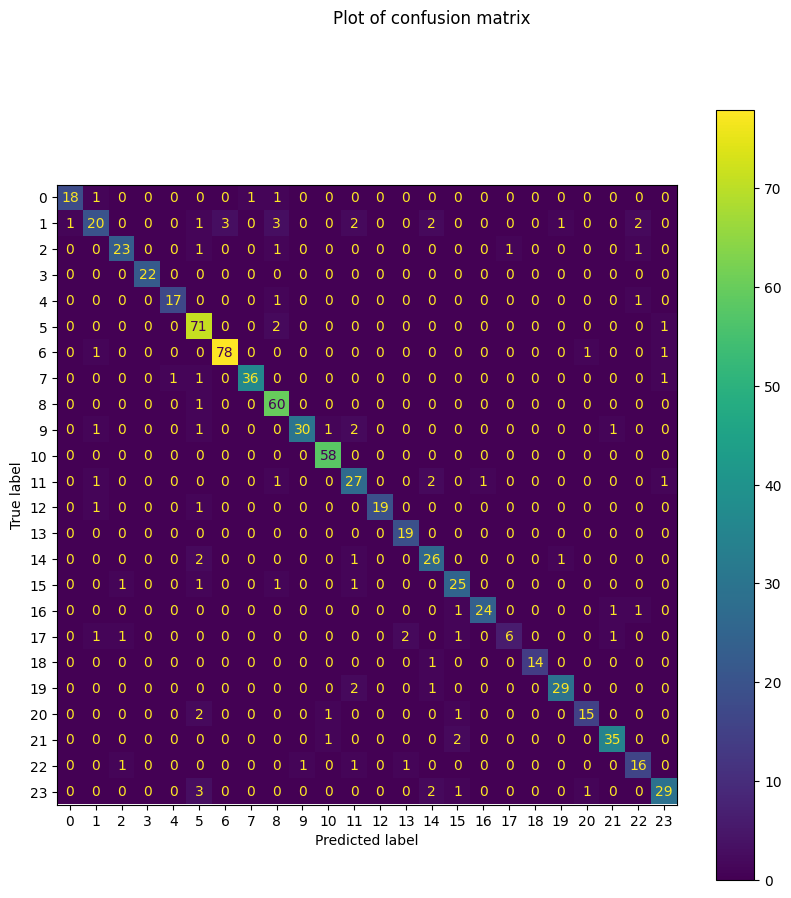

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
y_true = []
y_pred = []
for x,y in test_ds:
  y= tf.argmax(y,axis=1)
  y_true.append(y)
  y_pred.append(tf.argmax(ensemble_model.predict(x),axis = 1))

y_pred = tf.concat(y_pred, axis=0)
y_true = tf.concat(y_true, axis=0)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support as score

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
fig.suptitle('Plot of confusion matrix')
precision, recall, fscore, support = score(y_true, y_pred)

print("accuracy: ",100*accuracy_score(y_true, y_pred))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

In [9]:
SIZE = 224  #Resize images
import glob
import os
import numpy as np
import cv2
#Capture training data and labels into respective lists
train_images = []
train_labels = [] 

for directory_path in glob.glob("F:/softcom/dataset/festivals-Splitted - Copy/test/*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

#Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)
X = train_images

baisakhi
F:/softcom/dataset/festivals-Splitted - Copy/test\baisakhi\baisakhi-014.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\baisakhi\baisakhi-022.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\baisakhi\baisakhi-027.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\baisakhi\baisakhi-040.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\baisakhi\baisakhi-043.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\baisakhi\baisakhi-047.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\baisakhi\baisakhi-050.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\baisakhi\baisakhi-051.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\baisakhi\baisakhi-055.jpg
F:/softcom/dataset/festivals-Splitted - Copy/test\baisakhi\baisakhi-069.jpg
F:/softcom/dataset/festivals-Splitted - Copy/test\baisakhi\baisakhi-074.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\baisakhi\baisakhi-075.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\baisakhi\baisakhi-0

F:/softcom/dataset/festivals-Splitted - Copy/test\christmas\christmas-050.jpg
F:/softcom/dataset/festivals-Splitted - Copy/test\christmas\christmas-051.jpg
F:/softcom/dataset/festivals-Splitted - Copy/test\christmas\christmas-052.jpg
F:/softcom/dataset/festivals-Splitted - Copy/test\christmas\christmas-055.jpg
F:/softcom/dataset/festivals-Splitted - Copy/test\christmas\christmas-069.jpg
F:/softcom/dataset/festivals-Splitted - Copy/test\christmas\christmas-074.jpg
F:/softcom/dataset/festivals-Splitted - Copy/test\christmas\christmas-075.jpg
F:/softcom/dataset/festivals-Splitted - Copy/test\christmas\christmas-080.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\christmas\christmas-082.jpg
F:/softcom/dataset/festivals-Splitted - Copy/test\christmas\christmas-084.jpg
F:/softcom/dataset/festivals-Splitted - Copy/test\christmas\christmas-091.jpg
F:/softcom/dataset/festivals-Splitted - Copy/test\christmas\christmas-092.jpeg
diwali
F:/softcom/dataset/festivals-Splitted - Copy/test\diwal

F:/softcom/dataset/festivals-Splitted - Copy/test\durga puja\durgapuja-185.jpg
F:/softcom/dataset/festivals-Splitted - Copy/test\durga puja\durgapuja-187.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\durga puja\durgapuja-188.jpg
F:/softcom/dataset/festivals-Splitted - Copy/test\durga puja\durgapuja-197.jpg
F:/softcom/dataset/festivals-Splitted - Copy/test\durga puja\durgapuja-201.jpg
F:/softcom/dataset/festivals-Splitted - Copy/test\durga puja\durgapuja-205.jpg
F:/softcom/dataset/festivals-Splitted - Copy/test\durga puja\durgapuja-207.jpg
F:/softcom/dataset/festivals-Splitted - Copy/test\durga puja\durgapuja-209.jpg
F:/softcom/dataset/festivals-Splitted - Copy/test\durga puja\durgapuja-218.jpg
F:/softcom/dataset/festivals-Splitted - Copy/test\durga puja\durgapuja-222.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\durga puja\durgapuja-232.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\durga puja\durgapuja-235.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/tes

F:/softcom/dataset/festivals-Splitted - Copy/test\eid\eidp-185.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\eid\eidp-186.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\eid\eidp-187.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\eid\eidp-188.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\eid\eidp-197.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\eid\eidp-199.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\eid\eidp-201.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\eid\eidp-203.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\eid\eidp-205.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\eid\eidp-207.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\eid\eidp-209.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\eid\eidp-218.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\eid\eidp-229.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\eid\eidp-232.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/tes

F:/softcom/dataset/festivals-Splitted - Copy/test\holi\holi-274.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\holi\holi-278.jpg
F:/softcom/dataset/festivals-Splitted - Copy/test\holi\holi-286.jpeg
janmashtami
F:/softcom/dataset/festivals-Splitted - Copy/test\janmashtami\janmashtami-005.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\janmashtami\janmashtami-017.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\janmashtami\janmashtami-018.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\janmashtami\janmashtami-028.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\janmashtami\janmashtami-031.jpg
F:/softcom/dataset/festivals-Splitted - Copy/test\janmashtami\janmashtami-043.jpg
F:/softcom/dataset/festivals-Splitted - Copy/test\janmashtami\janmashtami-044.jpg
F:/softcom/dataset/festivals-Splitted - Copy/test\janmashtami\janmashtami-052.jpg
F:/softcom/dataset/festivals-Splitted - Copy/test\janmashtami\janmashtami-053.jpg
F:/softcom/dataset/festivals-Splitted - 

F:/softcom/dataset/festivals-Splitted - Copy/test\onam\onam-086.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\onam\onam-090.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\onam\onam-093.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\onam\onam-094.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\onam\onam-095.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\onam\onam-099.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\onam\onam-101.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\onam\onam-103.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\onam\onam-104.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\onam\onam-107.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\onam\onam-109.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\onam\onam-127.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\onam\onam-129.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\onam\onam-130.jpeg
F:/softcom/dataset/festivals-Split

shakrain
F:/softcom/dataset/festivals-Splitted - Copy/test\shakrain\shakrain-009.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\shakrain\shakrain-014.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\shakrain\shakrain-022.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\shakrain\shakrain-027.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\shakrain\shakrain-040.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\shakrain\shakrain-043.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\shakrain\shakrain-047.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\shakrain\shakrain-050.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\shakrain\shakrain-051.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\shakrain\shakrain-052.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\shakrain\shakrain-055.jpeg
F:/softcom/dataset/festivals-Splitted - Copy/test\shakrain\shakrain-065.jpg
F:/softcom/dataset/festivals-Splitted - Copy/test\shakrain\shakrain-

In [10]:
import json

# from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
import shap
import cv2
import random

# load pre-trained model and choose two images to explain
# model = ResNet50(weights="imagenet")

# image = cv2.imread('F:/softcom/dataset/festivals-Splitted - Copy/test/holi/holi-005.jpeg')
# image = cv2.resize(image, (224, 224))
# image = np.expand_dims(image, axis=0)
def f(X):
    tmp = X.copy()
#     preprocess_input(tmp)
    return model(tmp)

# X = image
# X, y = shap.datasets.imagenet50()

# load the ImageNet class names as a vectorized mapping function from ids to names
# url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
# with open(shap.datasets.cache(url)) as file:
#     class_names = [v[1] for v in json.load(file).values()]

class_names = train_ds.class_names

# define a masker that is used to mask out partitions of the input image, this one uses a blurred background
masker = shap.maskers.Image("inpaint_telea", (224,224,3))

# By default the Partition explainer is used for all  partition explainer
explainer = shap.Explainer(f, masker, output_names=class_names)
# for j in range(10):    
#     i = random.randint(10,800)
#     print(i, train_labels[i])
#     shap_values = explainer(
#     X[i:i+1], max_evals=500, batch_size=8, outputs=shap.Explanation.argsort.flip[:4]
#     )
#     shap.image_plot(shap_values)


637 pohela falgun


PartitionExplainer explainer: 2it [01:24, 84.66s/it]               


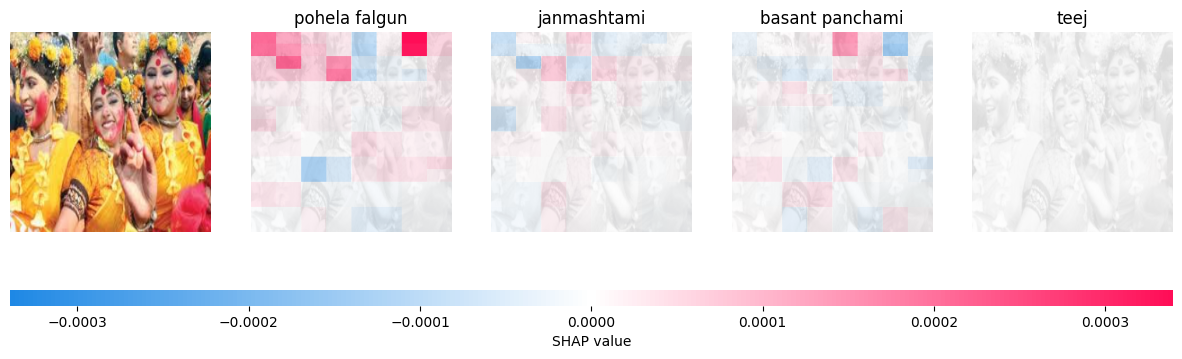

In [14]:
i = 637
print(i, train_labels[i])
shap_values = explainer(
X[i:i+1], max_evals=500, batch_size=8, outputs=shap.Explanation.argsort.flip[:4]
)
shap.image_plot(shap_values)